# **<span style="color: cyan;"><font size="6">House Price Prediction Using Neural Network</font><span>**

## <font size="5">Course: Multimedia Signal Processing for Autonomous System 2023/24</font>

### *<font size="5">Professor: Lucio Marcenaro</font>*


# *<font size="5">Student name: Musab Mustafa Wahbi Mohamedali</font>*
ID Number: s606713

# <span style="color: yellow;">Dataset Description: House Features for Price Prediction</span>

- This dataset provides a comprehensive overview of the features that influence house pricing, allowing for detailed analysis and modeling.


- The dataset comprises detailed information about various attributes of houses, which are crucial for predicting house prices. Below are key features included in the dataset:

1. **<span style="color: green;">MSZoning</span>**: General zoning classification (e.g., Agriculture, Commercial).
2. **<span style="color: green;">LotFrontage</span>**: Linear feet of street connected to property.
3. **<span style="color: green;">LotArea</span>**: Lot size in square feet.
4. **<span style="color: green;">Street</span>**: Type of road access (e.g., Gravel, Paved).
5. **<span style="color: green;">Alley</span>**: Type of alley access (if available).
6. **<span style="color: green;">LotShape</span>**: General shape of the property (e.g., Regular, Irregular).
7. **<span style="color: green;">LandContour</span>**: Flatness or slope of the property.
8. **<span style="color: green;">Utilities</span>**: Availability of utilities (e.g., All public utilities, Electricity only).
9. **<span style="color: green;">LotConfig</span>**: Lot configuration, such as corner lot or cul-de-sac.
10. **<span style="color: green;">LandSlope</span>**: Slope of the property (e.g., Gentle, Moderate).
11. **<span style="color: green;">Neighborhood</span>**: Various neighborhood names representing different areas within Ames, Iowa.
12. **<span style="color: green;">Condition1</span>**: Proximity to various conditions (e.g., arterial street, positive off-site feature).
13. **<span style="color: green;">Condition2</span>**: Additional proximity details (if applicable).
14. **<span style="color: green;">BldgType</span>**: Type of residential dwelling (e.g., Single-family, Duplex).
15. **<span style="color: green;">HouseStyle</span>**: Style of dwelling (e.g., One story, Two story).
16. **<span style="color: green;">OverallCond</span>**: Overall condition of the house, rated on a scale.
17. **<span style="color: green;">YearBuilt</span>**: Year the house was originally constructed.
18. **<span style="color: green;">YearRemodAdd</span>**: Year of remodeling or addition.
19. **<span style="color: green;">RoofStyle</span>**: Type of roof (e.g., Gable, Flat).
20. **<span style="color: green;">RoofMatl</span>**: Material of the roof (e.g., Shingle, Metal).
21. **<span style="color: green;">Exterior1st</span>**: Exterior covering material of the house.
22. **<span style="color: green;">Exterior2nd</span>**: Secondary exterior material (if any).
23. **<span style="color: green;">ExterQual</span>**: Quality of the exterior material.
24. **<span style="color: green;">ExterCond</span>**: Condition of the exterior material.
25. **<span style="color: green;">Foundation</span>**: Type of foundation (e.g., Cinder Block, Slab).
26. **<span style="color: green;">BsmtQual</span>**: Basement height quality.
27. **<span style="color: green;">BsmtCond</span>**: General condition of the basement.
28. **<span style="color: green;">BsmtExposure</span>**: Presence of walkout or garden level walls.
29. **<span style="color: green;">TotalBsmtSF</span>**: Total basement area in square feet.
30. **<span style="color: green;">Heating</span>**: Type of heating system.
31. **<span style="color: green;">HeatingQC</span>**: Heating quality and condition.
32. **<span style="color: green;">CentralAir</span>**: Central air conditioning (Yes/No).
33. **<span style="color: green;">Electrical</span>**: Electrical system details.
34. **<span style="color: green;">FullBath</span>**: Full bathrooms above grade.
35. **<span style="color: green;">HalfBath</span>**: Half bathrooms above grade.
36. **<span style="color: green;">Bedroom</span>**: Number of bedrooms above grade.
37. **<span style="color: green;">Kitchen</span>**: Number of kitchens above grade.
38. **<span style="color: green;">KitchenQual</span>**: Quality of the kitchen.
39. **<span style="color: green;">TotRmsAbvGrd</span>**: Total rooms above grade (excluding bathrooms).
40. **<span style="color: green;">GarageType</span>**: Type of garage.
41. **<span style="color: green;">GarageYrBlt</span>**: Year the garage was built.
42. **<span style="color: green;">GarageFinish</span>**: Interior finish of the garage.
43. **<span style="color: green;">GarageCars</span>**: Garage size in car capacity.
44. **<span style="color: green;">GarageArea</span>**: Size of the garage in square feet.
45. **<span style="color: green;">GarageQual</span>**: Quality of the garage.
46. **<span style="color: green;">GarageCond</span>**: Condition of the garage.
47. **<span style="color: green;">PavedDrive</span>**: Driveway paving (e.g., Paved, Gravel).
48. **<span style="color: green;">Fence</span>**: Quality and type of fence.
49. **<span style="color: green;">MiscFeature</span>**: Miscellaneous features (e.g., Shed, Tennis Court).
50. **<span style="color: green;">MoSold</span>**: Month sold.
51. **<span style="color: green;">YrSold</span>**: Year sold.
52. **<span style="color: green;">SaleType</span>**: Type of sale (e.g., Warranty Deed, Court Officer Deed).
53. **<span style="color: green;">SaleCondition</span>**: Condition of sale (e.g., Normal, Abnormal).



### A) Importing Libraries  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

### B) Loading and Preparing Data (Training & Test Set)

In [2]:
# Load the datasets
train_df = pd.read_csv('Training_Set.csv')
test_df = pd.read_csv('Test_Set.csv')

# Separate features and target
X_train = train_df.drop(columns=['ID', 'SalePrice'])
y_train = train_df['SalePrice']

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

#### Preprocessing Pipelines

In [3]:
# Define preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

#### Data Transformation and Splitting

In [4]:
# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed, y_train, test_size=0.2, random_state=42)

### C) Converting to PyTorch Tensors and DataLoader

In [5]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_split, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_split.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_split, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_split.values, dtype=torch.float32).view(-1, 1)

# Define PyTorch dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### D) Model Definition

In [6]:
# Define the model architecture with L2 regularization
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

### E) Training the Model

In [7]:
# Initialize the model, define the loss function and optimizer
input_dim = X_train_preprocessed.shape[1]
model = HousePriceModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)  # Adjusted learning rate

# Training loop
num_epochs = 150
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    if (epoch + 1) % 50 == 0:
       print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


Epoch 50/150, Training Loss: 29605482383.7808, Validation Loss: 30846580876.2740
Epoch 100/150, Training Loss: 7662127917.5890, Validation Loss: 8094336925.8082
Epoch 150/150, Training Loss: 1462720330.5205, Validation Loss: 1160047836.2740


#### Plotting and Saving the Model

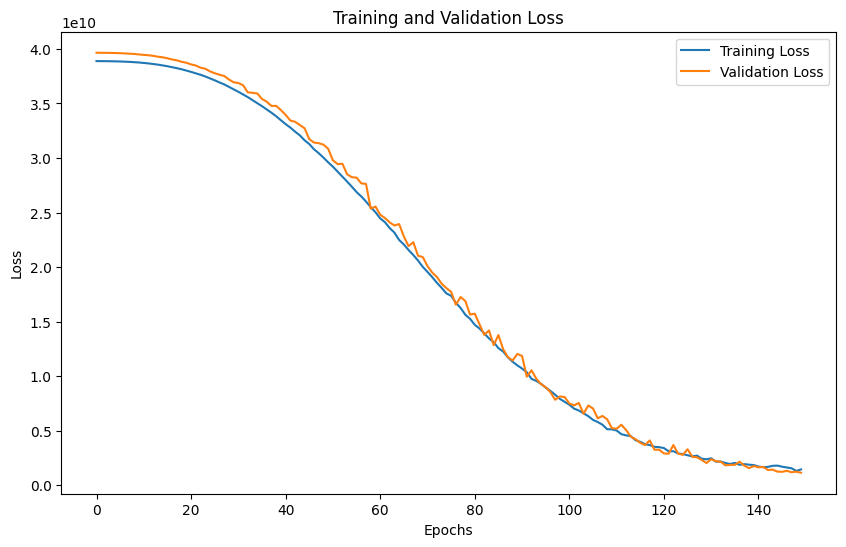

['preprocessor.pkl']

In [8]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), 'house_price_model.pth')
joblib.dump(preprocessor, 'preprocessor.pkl')


### F) Model Evaluation

Validation Mean Absolute Error (MAE): 22859.891076492935
Validation Mean Squared Error (MSE): 1160047883.3117352
Validation R-squared (R²): 0.8487615585327148


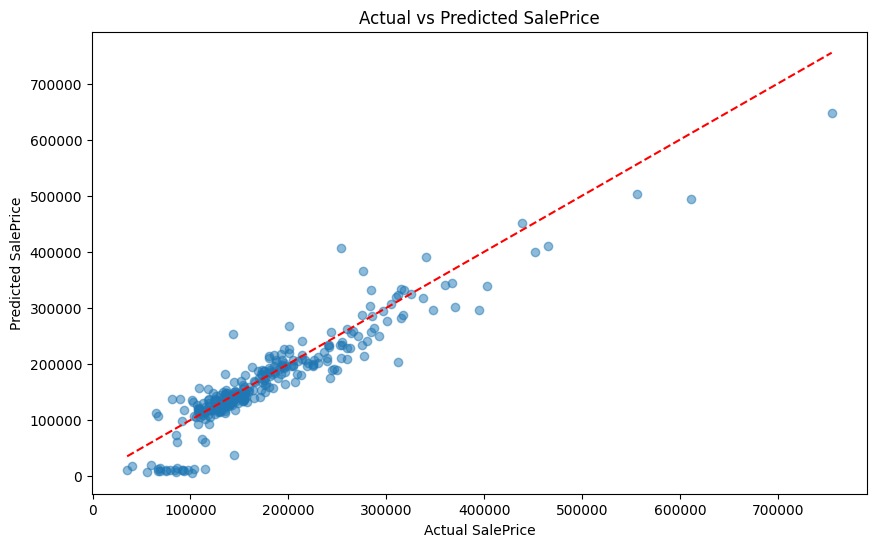

In [9]:
# Evaluation on the validation set
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_tensor).numpy().flatten()

# Ensure y_val_split is also 1-dimensional
y_val_split = y_val_split.values.ravel()

# Calculate performance metrics
mae = mean_absolute_error(y_val_split, y_val_pred)
mse = mean_squared_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {mae}')
print(f'Validation Mean Squared Error (MSE): {mse}')
print(f'Validation R-squared (R²): {r2}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_val_pred, alpha=0.5)
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

### Threshold and  Classification

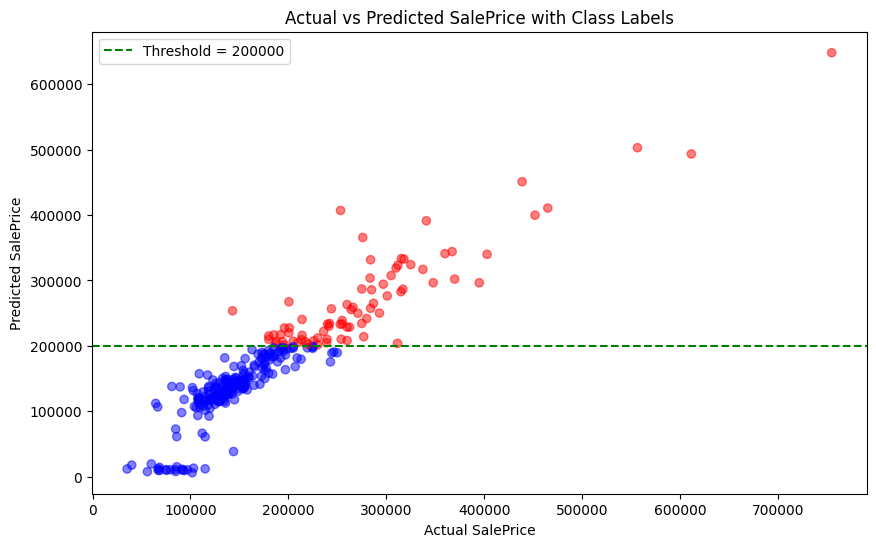

In [10]:
# Define the threshold for classification
threshold = 200000  # You can adjust this based on your data distribution

# After getting predictions from the regression model
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_tensor).numpy().flatten()

# Create class labels based on the threshold
y_val_pred_class = np.where(y_val_pred > threshold, 'high', 'low')
y_val_split_class = np.where(y_val_split > threshold, 'high', 'low')


# Scatter plot for actual vs. predicted classes
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_val_pred, alpha=0.5, c=['blue' if cls == 'low' else 'red' for cls in y_val_pred_class])
plt.axhline(threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice with Class Labels')
plt.legend()
plt.show()